In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

home_dir = "../"
src_path = os.path.join(home_dir, "src")

# Add the `src` folder to the Python path
sys.path.append(src_path)

from functions import (compute_distance_correlation_matrix,
 compute_simplicial_complex_and_landscapes, compute_wto_matrix, compute_pearson_correlation_matrix,
  patient_correlation_measure)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load data from cancer stages
expression_matrix = pd.read_csv("../data/cancer_stage/fpkm_matrix.csv", index_col=0)
significant_genes = pd.read_csv("../data/cancer_stage/significant_genes.csv", index_col=0)

# Separate phenotype labels
phenotype = expression_matrix["phenotype"]
expression_matrix = expression_matrix.drop(columns=["phenotype"])

# Select significant genes
significant_gene_names = significant_genes.index
sig_exp_matrix = expression_matrix[significant_gene_names.intersection(expression_matrix.columns)]

top_var_genes_data = sig_exp_matrix
gene_dict = {i: col_name for i, col_name in enumerate(top_var_genes_data.columns)}
top_var_genes_data["phenotype"] = phenotype.values

stage1_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage1']
stage2_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage2']
stage3_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage3']
stage4_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'Stage4']

stage1_top_var_genes_data = stage1_top_var_genes_data.drop(columns=["phenotype"])
stage2_top_var_genes_data = stage2_top_var_genes_data.drop(columns=["phenotype"])
stage3_top_var_genes_data = stage3_top_var_genes_data.drop(columns=["phenotype"])
stage4_top_var_genes_data = stage4_top_var_genes_data.drop(columns=["phenotype"])

stage1_pearson_corr_matrix = compute_pearson_correlation_matrix(stage1_top_var_genes_data.values)
stage2_pearson_corr_matrix = compute_pearson_correlation_matrix(stage2_top_var_genes_data.values)
stage3_pearson_corr_matrix = compute_pearson_correlation_matrix(stage3_top_var_genes_data.values)
stage4_pearson_corr_matrix = compute_pearson_correlation_matrix(stage4_top_var_genes_data.values)

# Define number of landscapes and resolution
num_landscape = 2
resolution = 100

# Split the data into training and testing sets for stage 1
stage1_train, stage1_test = train_test_split(
    stage1_top_var_genes_data, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for stage 2
stage2_train, stage2_test = train_test_split(
    stage2_top_var_genes_data, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for stage 3
stage3_train, stage3_test = train_test_split(
    stage3_top_var_genes_data, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for stage 4
stage4_train, stage4_test = train_test_split(
    stage4_top_var_genes_data, test_size=0.2, random_state=42
)

In [3]:
# Compute landscapes for training and testing sets for stage 1
stage1_train_landscapes = compute_simplicial_complex_and_landscapes(
    stage1_train.values, stage1_pearson_corr_matrix, num_landscape, resolution
)
stage1_test_landscapes = compute_simplicial_complex_and_landscapes(
    stage1_test.values, stage1_pearson_corr_matrix, num_landscape, resolution
)

# Compute landscapes for training and testing sets for stage 2
stage2_train_landscapes = compute_simplicial_complex_and_landscapes(
    stage2_train.values, stage2_pearson_corr_matrix, num_landscape, resolution
)
stage2_test_landscapes = compute_simplicial_complex_and_landscapes(
    stage2_test.values, stage2_pearson_corr_matrix, num_landscape, resolution
)

# Compute landscapes for training and testing sets for stage 3
stage3_train_landscapes = compute_simplicial_complex_and_landscapes(
    stage3_train.values, stage3_pearson_corr_matrix, num_landscape, resolution
)

stage3_test_landscapes = compute_simplicial_complex_and_landscapes(
    stage3_test.values, stage3_pearson_corr_matrix, num_landscape, resolution
)

# Compute landscapes for training and testing sets for stage 4
stage4_train_landscapes = compute_simplicial_complex_and_landscapes(
    stage4_train.values, stage4_pearson_corr_matrix, num_landscape, resolution
)

stage4_test_landscapes = compute_simplicial_complex_and_landscapes(
    stage4_test.values, stage4_pearson_corr_matrix, num_landscape, resolution
)

# Combine training landscapes
train_landscapes = np.vstack([stage1_train_landscapes, stage2_train_landscapes, stage3_train_landscapes, stage4_train_landscapes])
train_labels = np.concatenate([
    np.full(stage1_train_landscapes.shape[0], 1),  # Label 1 for stage 1
    np.full(stage2_train_landscapes.shape[0], 2),  # Label 2 for stage 2
    np.full(stage3_train_landscapes.shape[0], 3),   # Label 3 for PCPG 3
    np.full(stage4_train_landscapes.shape[0], 4)
])

# Combine testing landscapes
test_landscapes = np.vstack([stage1_test_landscapes, stage2_test_landscapes, stage3_test_landscapes, stage4_test_landscapes])
test_labels = np.concatenate([
    np.full(stage1_test_landscapes.shape[0], 1),  # Label 1 for stage 1
    np.full(stage2_test_landscapes.shape[0], 2),  # Label 2 for stage 2
    np.full(stage3_test_landscapes.shape[0], 3),   # Label 3 for stage 3
    np.full(stage4_test_landscapes.shape[0], 4)
])

# Check shapes
print("Training Landscapes shape:", train_landscapes.shape)
print("Training Labels shape:", train_labels.shape)
print("Testing Landscapes shape:", test_landscapes.shape)
print("Testing Labels shape:", test_labels.shape)


Computing the Simplicial Complex and persistence for patients


100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 118/118 [00:28<00:00,  4.09it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 30/30 [00:06<00:00,  4.33it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 105/105 [00:29<00:00,  3.60it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 27/27 [00:07<00:00,  3.54it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 138/138 [00:25<00:00,  5.39it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 35/35 [00:06<00:00,  5.65it/s]

Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Training Landscapes shape: (387, 600)
Training Labels shape: (387,)
Testing Landscapes shape: (99, 600)
Testing Labels shape: (99,)


In [4]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, log_loss
from sklearn.model_selection import GridSearchCV


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4], 
    'oob_score': [True]         # Minimum samples at a leaf node
}

# Perform Grid Search with Cross-Validation for Hyperparameter Tuning
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(train_landscapes, train_labels)

# Get the best model from Grid Search
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Train the best model on training data
best_rf_model.fit(train_landscapes, train_labels)

# Evaluate the best model
train_predictions = best_rf_model.predict(train_landscapes)
test_predictions = best_rf_model.predict(test_landscapes)
test_probabilities = best_rf_model.predict_proba(test_landscapes)

train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)
classification_rep = classification_report(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Calculate metrics
mse = mean_squared_error(test_labels, np.argmax(test_probabilities, axis=1))
logloss = log_loss(test_labels, test_probabilities)

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Display OOB score
if hasattr(best_rf_model, 'oob_score_') and best_rf_model.oob_score_:
    print(f"OOB Score: {best_rf_model.oob_score_:.4f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}
Training Accuracy: 1.0000
Test Accuracy: 0.5758
Mean Squared Error (MSE): 1.8485
Log Loss: 1.0481

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           2       0.57      0.77      0.66        30
           3       0.80      0.15      0.25        27
           4       0.55      0.83      0.66        35

    accuracy                           0.58        99
   macro avg       0.73      0.47      0.45        99
weighted avg       0.66      0.58      0.52        99


Confusion Matrix:
 [[ 1  0  1  5]
 [ 0 23  0  7]
 [ 0 11  4 12]
 [ 0  6  0 29]]
OOB Score: 0.8501


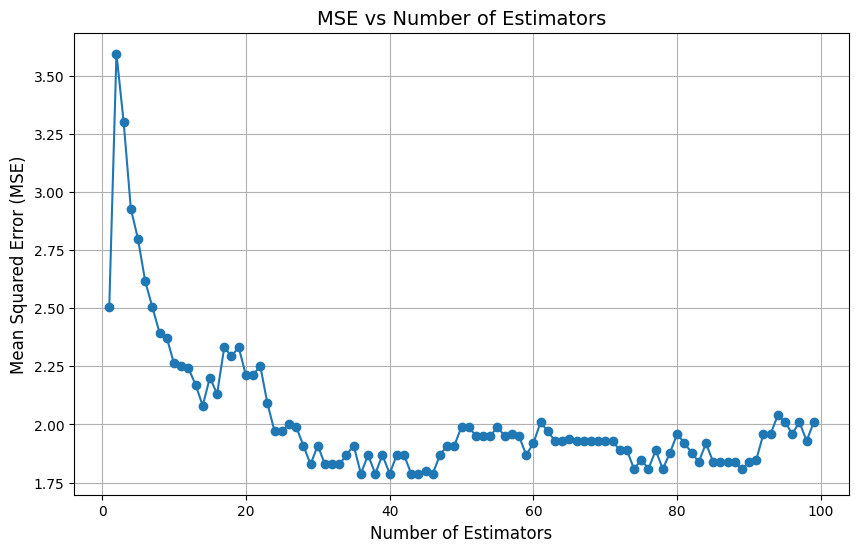

In [5]:
# Train the best model and evaluate
mse_values = []
n_estimators_range = list(range(1, best_rf_model.n_estimators))
for n in n_estimators_range:
    temp_model = RandomForestClassifier(
        n_estimators=n,
        max_depth=best_rf_model.max_depth,
        min_samples_split=best_rf_model.min_samples_split,
        min_samples_leaf=best_rf_model.min_samples_leaf,
        oob_score=True,
        random_state=42
    )
    temp_model.fit(train_landscapes, train_labels)
    predictions = temp_model.predict(test_landscapes)
    probabilities = temp_model.predict_proba(test_landscapes)
    mse = mean_squared_error(test_labels, np.argmax(probabilities, axis=1))
    mse_values.append(mse)

# Plotting MSE vs Number of Estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values, marker='o')
plt.title('MSE vs Number of Estimators', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True)
plt.show()

In [6]:
# Extract cross-validation results
cv_results = grid_search.cv_results_

# Convert results to a DataFrame for easier inspection
cv_results_df = pd.DataFrame(cv_results)

# Select and display important columns
columns_to_display = [
    'param_n_estimators',
    'param_max_depth',
    'param_min_samples_split',
    'param_min_samples_leaf',
    'mean_test_score',  # Average CV accuracy score for each parameter combination
    'std_test_score',   # Standard deviation of the CV scores
    'split0_test_score', 
    'split1_test_score', 
    'split2_test_score', 
    'split3_test_score', 
    'split4_test_score',
     'rank_test_score'
]
# Filter the results and sort by rank_test_score
cv_results_summary = cv_results_df[columns_to_display]
cv_results_summary_sorted = cv_results_summary.sort_values(by='rank_test_score')

# Save all results to a CSV file
cv_results_summary_sorted.to_csv('results/pearsons_cv_results.csv', index=False)

top_10_results = cv_results_summary_sorted.head(10)

# Display the top 10 results in this notebook environment
print("Top 10 CV Results:")
print(top_10_results)

Top 10 CV Results:
    param_n_estimators param_max_depth  param_min_samples_split  \
1                  100            None                        2   
55                 100              20                        2   
28                 100              10                        2   
64                 100              20                        2   
10                 100            None                        2   
29                 200              10                        2   
37                 100              10                        2   
2                  200            None                        2   
56                 200              20                        2   
32                 200              10                        5   

    param_min_samples_leaf  mean_test_score  std_test_score  \
1                        1         0.857742        0.045320   
55                       1         0.857742        0.045320   
28                       1         0.857709        0.0